## 1. Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries loaded successfully.")

Libraries loaded successfully.


## 2. Load Datasets

In [65]:
df_faostat = pd.read_csv("data/FAOSTAT_data_en_11-18-2025.csv")
df_crop_labels = pd.read_csv("data/Crop_recommendation.csv")

print("\nFAOSTAT Dataset:")
display(df_faostat.head())
print("Shape:", df_faostat.shape)

print("\nCrop Label Dataset:")
display(df_crop_labels.head())
print("Shape:", df_crop_labels.shape)


FAOSTAT Dataset:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,ha,446931.0,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,kg/ha,584.4,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,t,261170.0,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2006,2006,ha,473089.0,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2006,2006,kg/ha,568.1,A,Official figure,NaN


Shape: (4996, 15)

Crop Label Dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


Shape: (2200, 8)


## 3. Split Multi-Value Items into Individual Crops

Some items in `FAOSTAT.csv` dataset contain **multiple crops separated by commas**.  
We split these into individual rows for accurate merging.

In [66]:
df_faostat["crop_list"] = df_faostat["Item"].astype(str).str.split(",")
df_faostat_exploded = df_faostat.explode("crop_list").reset_index(drop=True)
df_faostat_exploded["crop_clean"] = df_faostat_exploded["crop_list"].str.lower().str.strip()

print("\nExploded FAOSTAT Dataset:")
display(df_faostat_exploded.head())
print("Shape:", df_faostat_exploded.shape)


Exploded FAOSTAT Dataset:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,crop_list,crop_clean
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,ha,446931.0,A,Official figure,NaN,Anise,anise
1,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,ha,446931.0,A,Official figure,NaN,badian,badian
2,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,ha,446931.0,A,Official figure,NaN,coriander,coriander
3,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,ha,446931.0,A,Official figure,NaN,cumin,cumin
4,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2005,2005,ha,446931.0,A,Official figure,NaN,caraway,caraway


Shape: (7662, 17)


## 4. Clean Crop Labels

We standardize the labels in `CropLabels.csv` to lowercase and strip whitespace.  
This ensures a **consistent merge** with `FAOSTAT.csv`.


In [67]:
df_crop_labels["label_clean"] = df_crop_labels["label"].astype(str).str.lower().str.strip()

print("\nCleaned Crop Label Dataset:")
display(df_crop_labels[["label", "label_clean"]].head())


Cleaned Crop Label Dataset:


,label,label_clean
0,rice,rice
1,rice,rice
2,rice,rice
3,rice,rice
4,rice,rice


## 5. Merge Datasets on Cleaned Crop Names

Perform an **inner merge** to combine FAOSTAT and Crop Label data based on `crop_clean` and `label_clean`.


In [68]:
df_merged = pd.merge(
    df_faostat_exploded,
    df_crop_labels,
    left_on="crop_clean",
    right_on="label_clean",
    how="inner"
)

print("\nMerged Dataset:")
display(df_merged.head())
print("Shape:", df_merged.shape)
print("Columns:", df_merged.columns.tolist())


Merged Dataset:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,crop_clean,N,P,K,temperature,humidity,ph,rainfall,label,label_clean
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01610,"Coffee, green",2005,2005,...,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee,coffee
1,QCL,Crops and livestock products,356,India,5312,Area harvested,01610,"Coffee, green",2005,2005,...,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee,coffee
2,QCL,Crops and livestock products,356,India,5312,Area harvested,01610,"Coffee, green",2005,2005,...,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee,coffee
3,QCL,Crops and livestock products,356,India,5312,Area harvested,01610,"Coffee, green",2005,2005,...,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee,coffee
4,QCL,Crops and livestock products,356,India,5312,Area harvested,01610,"Coffee, green",2005,2005,...,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee,coffee


Shape: (22800, 26)
Columns: ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note', 'crop_list', 'crop_clean', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'label_clean']


## 6. Null Value Analysis

Check for missing values per column **before cleaning**.

In [69]:
print("\nNull Values per Column:")
print(df_merged.isnull().sum())


Null Values per Column:
Domain Code             0
Domain                  0
Area Code (M49)         0
Area                    0
Element Code            0
Element                 0
Item Code (CPC)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Flag Description        0
Note                22800
crop_list               0
crop_clean              0
N                       0
P                       0
K                       0
temperature             0
humidity                0
ph                      0
rainfall                0
label                   0
label_clean             0
dtype: int64


## 7. Duplicate Analysis

Check for **exact duplicates** and **logical duplicates** based on key columns: `Area`, `Year`, `crop_clean`.


In [70]:
print("\nExact Duplicates:", df_merged.duplicated().sum())

key_columns = ["Area", "Year", "crop_clean"]
existing_keys = [c for c in key_columns if c in df_merged.columns]

if existing_keys:
    logical_duplicates = df_merged.duplicated(subset=existing_keys).sum()
    print("Logical Key Duplicates:", logical_duplicates)
else:
    print("No suitable key columns for logical duplicate check.")


Exact Duplicates: 0
Logical Key Duplicates: 22724


## 8. Clean Missing Values & Deduplicate

- Remove **duplicate rows**.  
- Fill missing numeric values with **median** of each column.  

In [71]:
df_cleaned = df_merged.drop_duplicates().copy()

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns:
    if df_cleaned[col].isnull().any():
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

print("\nDataset after NA handling and deduplication:")
display(df_cleaned.head())
print("Shape:", df_cleaned.shape)


Dataset after NA handling and deduplication:


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,crop_clean,N,P,K,temperature,humidity,ph,rainfall,label,label_clean
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01610,"Coffee, green",2005,2005,...,coffee,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee,coffee
1,QCL,Crops and livestock products,356,India,5312,Area harvested,01610,"Coffee, green",2005,2005,...,coffee,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee,coffee
2,QCL,Crops and livestock products,356,India,5312,Area harvested,01610,"Coffee, green",2005,2005,...,coffee,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee,coffee
3,QCL,Crops and livestock products,356,India,5312,Area harvested,01610,"Coffee, green",2005,2005,...,coffee,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee,coffee
4,QCL,Crops and livestock products,356,India,5312,Area harvested,01610,"Coffee, green",2005,2005,...,coffee,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee,coffee


Shape: (22800, 26)


## 9. Outlier Visualization

We visualize numeric columns using **boxplots** before and after cleaning.  


Boxplots Before Cleaning (Original Data):


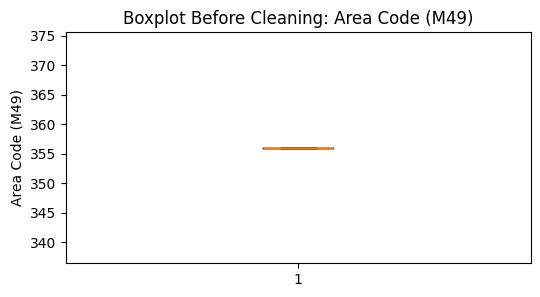

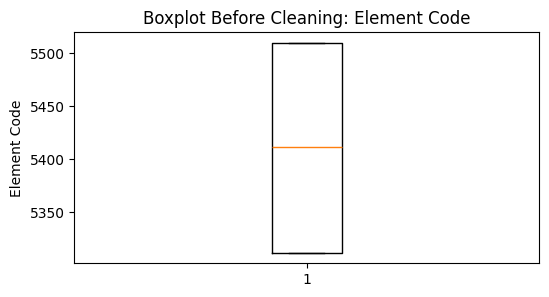

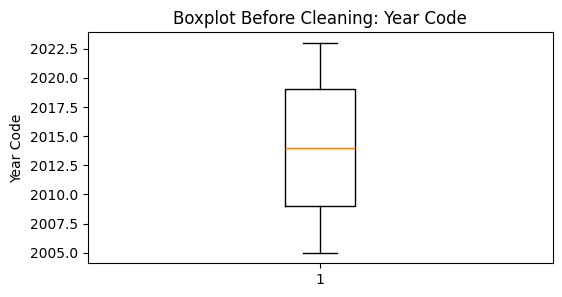

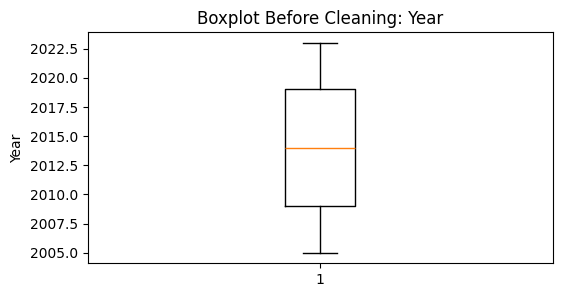

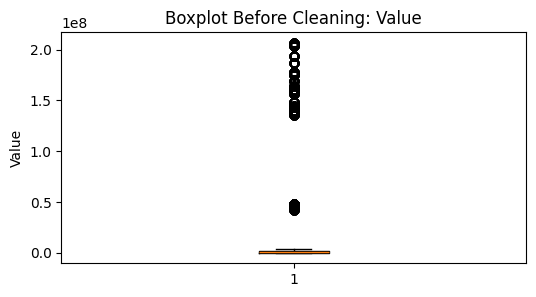

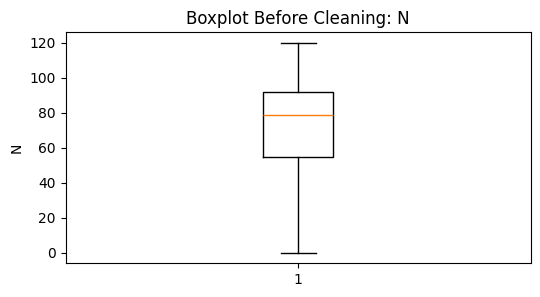

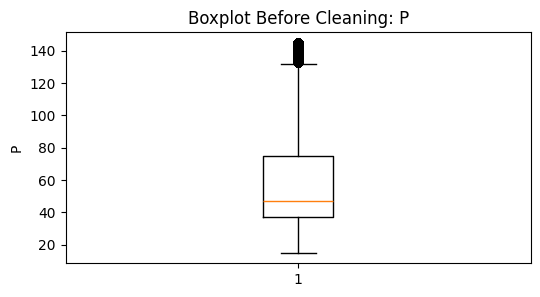

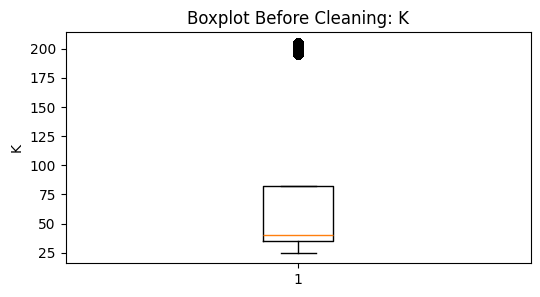

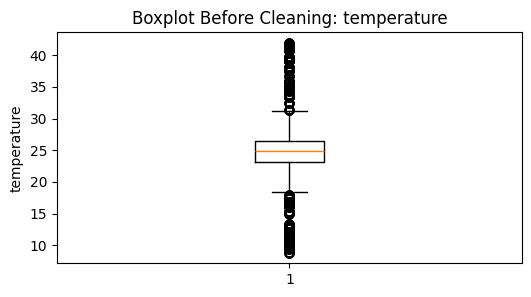

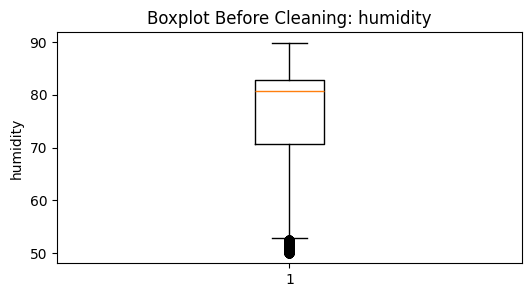

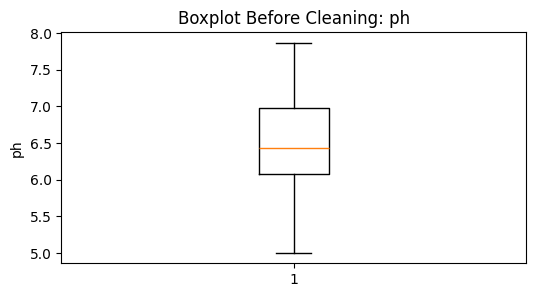

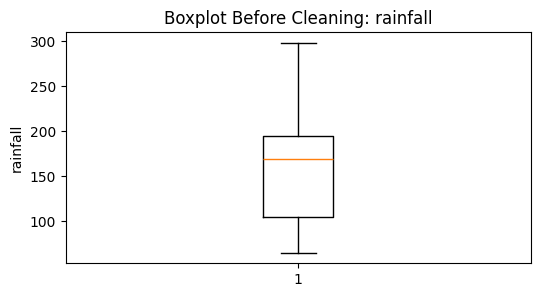


Boxplots After Cleaning (NA Handling & Deduplication):


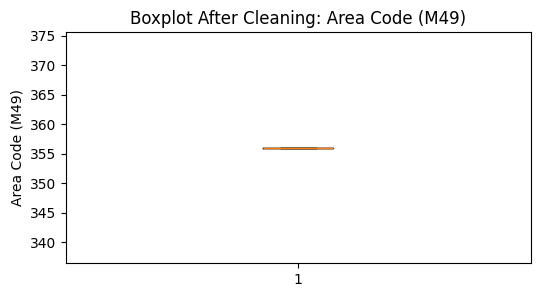

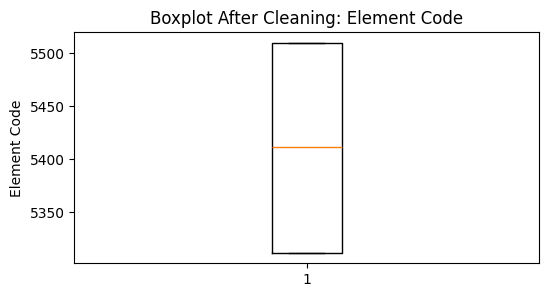

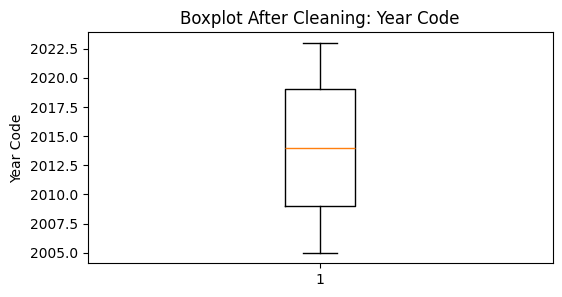

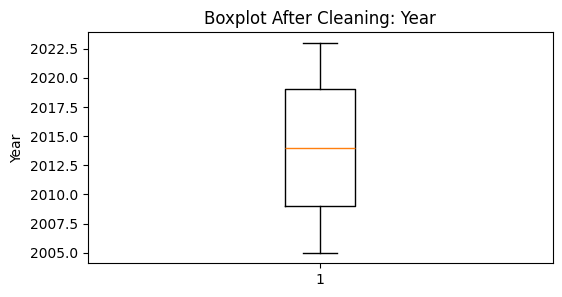

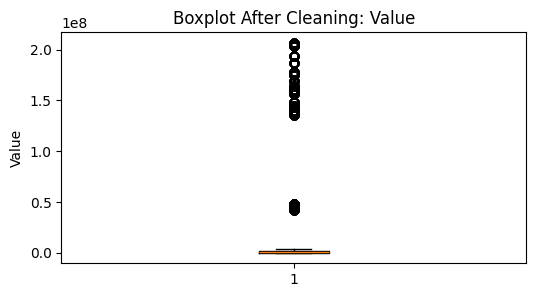

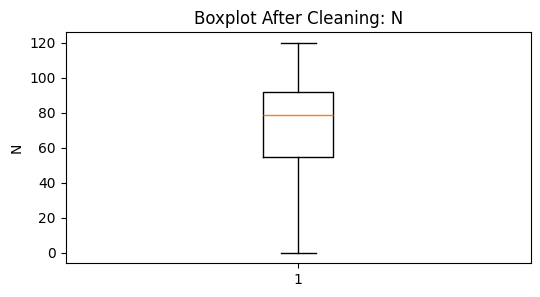

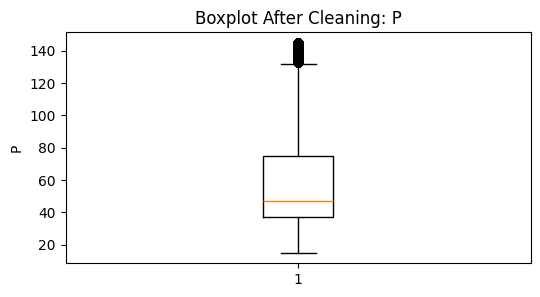

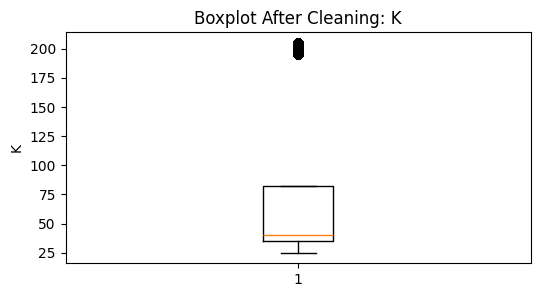

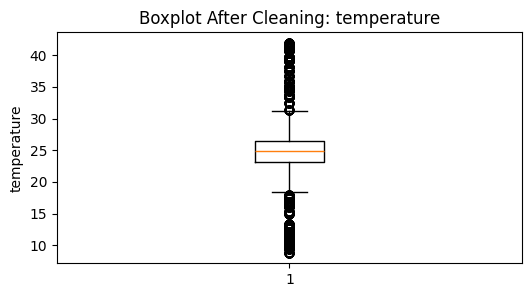

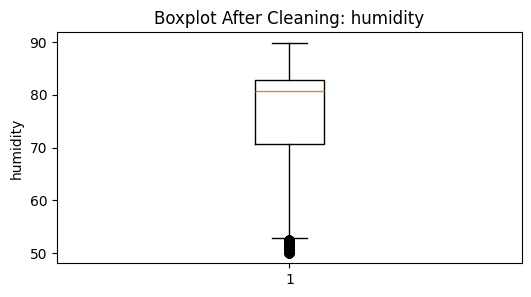

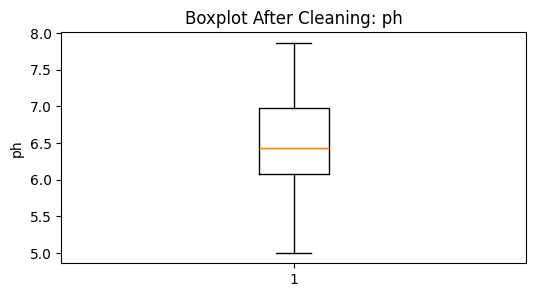

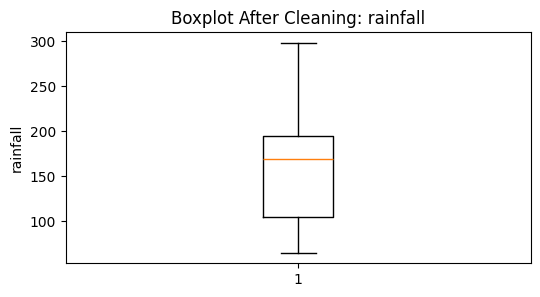

In [72]:
# Before Cleaning
print("\nBoxplots Before Cleaning (Original Data):")
for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df_merged[col].dropna())
    plt.title(f"Boxplot Before Cleaning: {col}")
    plt.ylabel(col)
    plt.show()

# After Cleaning
print("\nBoxplots After Cleaning (NA Handling & Deduplication):")
for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df_cleaned[col].dropna())
    plt.title(f"Boxplot After Cleaning: {col}")
    plt.ylabel(col)
    plt.show()
